In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Data exploration

### Import and load the data

In [30]:
df = pd.read_csv("C:/Negin-Centennial-apps/Data Warehouse-309/Project2/Bicycle_Thefts.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
df.head()

,X,Y,OBJECTID,event_unique_id,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,Occurrence_DayOfMonth,...,Bike_Make,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Longitude,Latitude,ObjectId2
0,-8.850630e+06,5.411196e+06,17744,GO-20179016397,THEFT UNDER,2017/10/03 04:00:00+00,2017,October,Tuesday,3,...,GI,ESCAPE 2,OT,7,BLK,700.0,STOLEN,-79.506560,43.648427,1
1,-8.850439e+06,5.412149e+06,17759,GO-20172033056,THEFT UNDER - BICYCLE,2017/11/08 05:00:00+00,2017,November,Wednesday,8,...,UNKNOWN MAKE,NaN,TO,1,BLK,1100.0,RECOVERED,-79.504849,43.654623,2
2,-8.851203e+06,5.411169e+06,17906,GO-20189030822,THEFT UNDER - BICYCLE,2018/09/14 04:00:00+00,2018,September,Friday,14,...,OT,CROSSTRAIL,MT,24,BLK,904.0,STOLEN,-79.511709,43.648253,3
3,-8.851203e+06,5.411169e+06,17962,GO-2015804467,THEFT UNDER,2015/05/07 04:00:00+00,2015,May,Thursday,7,...,GT,NaN,TO,10,BLKDGR,400.0,STOLEN,-79.511709,43.648253,4
4,-8.851160e+06,5.411032e+06,17963,GO-20159002781,THEFT UNDER,2015/05/16 04:00:00+00,2015,May,Saturday,16,...,GI,NaN,MT,6,RED,600.0,STOLEN,-79.511327,43.647364,5


### Not Needed : 'X',  'Y', 'OBJECTID', 'event_unique_id', 'Occurrence_Date', 'Occurrence_DayOfMonth', 'Occurrence_DayOfYear', 'Occurrence_Hour', 'Report_Date', 'Report_Year', 'Report_Month', 'Report_DayOfWeek', 'Report_DayOfMonth', 'Report_DayOfYear', 'Report_Hour', 'Division', 'City', 'Hood_ID', 'Bike_Make', 'Bike_Model', 'Bike_Type', 'Bike_Speed', 'Bike_Colour', 'Longitude', 'Latitude', 'ObjectId2'

In [32]:
# Removing columns which do not hold useful data
df= df.drop(['X',  'Y', 'OBJECTID', 'event_unique_id', 'Occurrence_Date', 'Occurrence_DayOfMonth', 'Occurrence_DayOfYear', 'Occurrence_Hour', 'Report_Date', 'Report_Year', 'Report_Month', 'Report_DayOfWeek', 'Report_DayOfMonth', 'Report_DayOfYear', 'Report_Hour', 'Division', 'City', 'Hood_ID', 'Bike_Make', 'Bike_Model', 'Bike_Type', 'Bike_Speed', 'Bike_Colour', 'Longitude', 'Latitude', 'ObjectId2'], axis=1)

In [33]:
df.head()

,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,NeighbourhoodName,Location_Type,Premises_Type,Cost_of_Bike,Status
0,THEFT UNDER,2017,October,Tuesday,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,700.0,STOLEN
1,THEFT UNDER - BICYCLE,2017,November,Wednesday,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,1100.0,RECOVERED
2,THEFT UNDER - BICYCLE,2018,September,Friday,Kingsway South (15),Ttc Subway Station,Transit,904.0,STOLEN
3,THEFT UNDER,2015,May,Thursday,Kingsway South (15),Ttc Subway Station,Transit,400.0,STOLEN
4,THEFT UNDER,2015,May,Saturday,Kingsway South (15),Ttc Subway Station,Transit,600.0,STOLEN


In [34]:
df = df[df.Status != 'UNKNOWN']

In [35]:
df.head()

,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,NeighbourhoodName,Location_Type,Premises_Type,Cost_of_Bike,Status
0,THEFT UNDER,2017,October,Tuesday,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,700.0,STOLEN
1,THEFT UNDER - BICYCLE,2017,November,Wednesday,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,1100.0,RECOVERED
2,THEFT UNDER - BICYCLE,2018,September,Friday,Kingsway South (15),Ttc Subway Station,Transit,904.0,STOLEN
3,THEFT UNDER,2015,May,Thursday,Kingsway South (15),Ttc Subway Station,Transit,400.0,STOLEN
4,THEFT UNDER,2015,May,Saturday,Kingsway South (15),Ttc Subway Station,Transit,600.0,STOLEN


In [36]:
df.isnull().sum()

Primary_Offence            0
Occurrence_Year            0
Occurrence_Month           0
Occurrence_DayOfWeek       0
NeighbourhoodName          0
Location_Type              0
Premises_Type              0
Cost_of_Bike            1441
Status                     0
dtype: int64

In [37]:
df.shape[0]


25115

<AxesSubplot:>

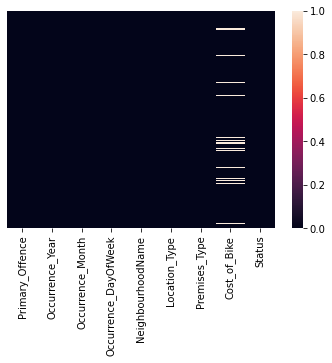

In [38]:
sns.heatmap(df.isnull(),yticklabels=False)

In [39]:
uni = df['Occurrence_Year'].unique()
print(sorted(uni))

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [40]:
uni = df['Primary_Offence'].unique()
print(sorted(uni))


['AGGRAVATED ASLT PEACE OFFICER', 'ARR/WARR EXECUTED NO ADDED CHG', 'ASSAULT', 'ASSAULT - FORCE/THRT/IMPEDE', 'ASSAULT - RESIST/ PREVENT SEIZ', 'ASSAULT BODILY HARM', 'ASSAULT WITH WEAPON', 'B&E', 'B&E OUT', "B&E W'INTENT", 'CARRYING CONCEALED WEAPON', 'DRUG - POSS METH (SCHD I)', 'DRUG - TRAF CANNABIS (SCHD II)', 'DRUG - TRAF OTHER (SCHD I)', 'FIRE - DETERMINED', 'FRAUD - IDENTITY/PERS W-INT', 'FRAUD OVER', 'FRAUD UNDER', 'FTC PROBATION ORDER', 'FTC WITH CONDITIONS', 'INCIDENT', 'INFORMATION ONLY', 'INVALID GO - RMS ONLY', 'LIQUOR - INTOXICATED', 'MISCHIEF - ENDANGER LIFE', 'MISCHIEF - INTERFERE W-PROP', 'MISCHIEF TO VEHICLE', 'MISCHIEF UNDER', 'OTHER FEDERAL STATUTE OFFENCES', 'POSSESSION HOUSE BREAK INSTRUM', 'POSSESSION PROPERTY OBC OVER', 'POSSESSION PROPERTY OBC UNDER', 'PROPERTY - FOUND', 'PROPERTY - LOST', 'PROPERTY - RECOVERED', 'PUBLIC MISCHIEF', 'ROBBERY - BUSINESS', 'ROBBERY - HOME INVASION', 'ROBBERY - MUGGING', 'ROBBERY - OTHER', 'ROBBERY - SWARMING', 'ROBBERY WITH WEAPON

In [41]:
len(uni)

59

In [42]:
uni = df['Premises_Type'].unique()
print(sorted(uni))

['Apartment', 'Commercial', 'Educational', 'House', 'Other', 'Outside', 'Transit']


In [43]:
uni = df['Status'].unique()
print(sorted(uni))

['RECOVERED', 'STOLEN']


Text(0.5, 1.0, 'Histogram')

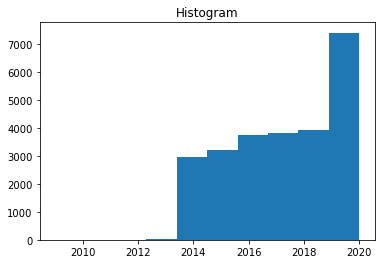

In [44]:
plt.hist(df["Occurrence_Year"])
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

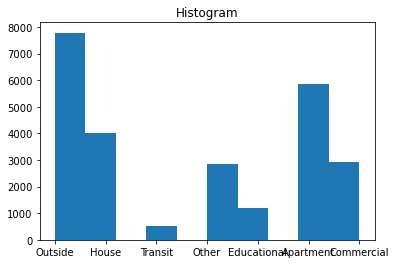

In [45]:
plt.hist(df["Premises_Type"])
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

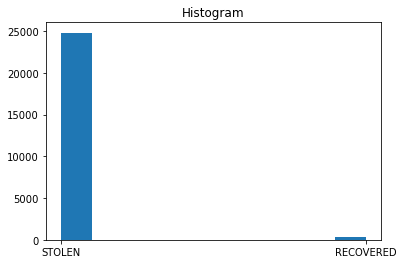

In [46]:
plt.hist(df["Status"])
plt.title("Histogram")

# Data Modelling


In [47]:
types = pd.get_dummies( df["Status"] , drop_first=True)

In [48]:
types.head()

,STOLEN
0,1
1,0
2,1
3,1
4,1


In [49]:
df = df.drop("Status", axis=1)

In [50]:
df.head()

,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,NeighbourhoodName,Location_Type,Premises_Type,Cost_of_Bike
0,THEFT UNDER,2017,October,Tuesday,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,700.0
1,THEFT UNDER - BICYCLE,2017,November,Wednesday,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,1100.0
2,THEFT UNDER - BICYCLE,2018,September,Friday,Kingsway South (15),Ttc Subway Station,Transit,904.0
3,THEFT UNDER,2015,May,Thursday,Kingsway South (15),Ttc Subway Station,Transit,400.0
4,THEFT UNDER,2015,May,Saturday,Kingsway South (15),Ttc Subway Station,Transit,600.0


In [51]:
finalData = pd.concat([df, types], axis=1)

In [52]:
finalData.head()

,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,NeighbourhoodName,Location_Type,Premises_Type,Cost_of_Bike,STOLEN
0,THEFT UNDER,2017,October,Tuesday,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,700.0,1
1,THEFT UNDER - BICYCLE,2017,November,Wednesday,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,1100.0,0
2,THEFT UNDER - BICYCLE,2018,September,Friday,Kingsway South (15),Ttc Subway Station,Transit,904.0,1
3,THEFT UNDER,2015,May,Thursday,Kingsway South (15),Ttc Subway Station,Transit,400.0,1
4,THEFT UNDER,2015,May,Saturday,Kingsway South (15),Ttc Subway Station,Transit,600.0,1


In [53]:
finalData.describe()

,Occurrence_Year,Cost_of_Bike,STOLEN
count,25115.000000,23674.000000,25115.000000
mean,2017.128210,949.694433,0.987736
std,1.959383,1677.669527,0.110062
min,2009.000000,0.000000,0.000000
25%,2016.000000,350.000000,1.000000
50%,2017.000000,600.000000,1.000000
75%,2019.000000,1000.000000,1.000000
max,2020.000000,120000.000000,1.000000


In [61]:
finalData.corr()

,Occurrence_Year,Cost_of_Bike,STOLEN
Occurrence_Year,1.000000,0.033064,0.015231
Cost_of_Bike,0.033064,1.000000,-0.007267
STOLEN,0.015231,-0.007267,1.000000


In [93]:
finalData.columns.values

array(['Primary_Offence', 'Occurrence_Year', 'Occurrence_Month',
       'Occurrence_DayOfWeek', 'NeighbourhoodName', 'Location_Type',
       'Premises_Type', 'Cost_of_Bike', 'STOLEN'], dtype=object)

 # Prepare the data for the Model Building

In [98]:
finalData_vars = finalData.columns.values.tolist()
Y=['Status']
X=[i for i in finalData_vars if i not in Y]
type(Y)
type(X)

list

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 20)
rfe = rfe.fit(finalData[X], finalData[Y])
print(rfe.support_)
print(rfe.ranking_)
cols=['Primary_Offence', 'Occurrence_Year', 'Occurrence_Month',
       'Occurrence_DayOfWeek', 'NeighbourhoodName', 'Location_Type',
       'Premises_Type', 'Cost_of_Bike']
X=finalData[cols]
Y=finalData['Status']
type(Y)
type(X)

KeyError: "None of [Index(['Status'], dtype='object')] are in the [columns]"